In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X_load = df_load.drop('Class label', axis=1)
Y_load = df_load['Class label']
df_load.head()

,Class label,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,2.0,-0.016488,-1.310538,-1.552489,-0.785475,1.548429,0.476687,1.090010,-0.351870,-0.000855,-1.932941,0.499177,0.149137,-0.640413,-0.782951,-0.903561
1,0.0,-0.844201,-1.235142,-0.624408,1.502470,-0.079536,1.482053,1.178544,-1.150090,-1.040124,-1.041435,0.281037,-0.283710,-1.176802,0.718408,-0.392095
2,0.0,-0.181053,0.039422,-0.307827,0.162256,-1.283705,0.541288,0.019113,-0.470718,-1.045754,0.983150,-0.121205,-0.189225,-0.539178,0.825261,0.612889
3,2.0,-0.423555,-1.598754,1.597206,-0.239330,1.443564,2.657538,1.824393,-1.809287,1.058634,-4.058539,0.255908,-0.952422,-0.315551,1.854246,-2.369018
4,2.0,-0.499408,-0.814229,-0.178777,-1.757823,0.678134,3.552825,1.483069,-2.341943,2.155062,-4.380612,-0.239352,-1.730919,0.586125,3.902178,-2.891653


In [27]:
sc = StandardScaler()
Z = sc.fit_transform(X_load)
Z_pca = PCA(n_components=2).fit_transform(Z)
exp_var_ratio = PCA(n_components=2).fit(Z).explained_variance_ratio_
print(exp_var_ratio)
# 即便 explained variance ratio這麼高，仍然無法在2維空間中好好表示。

[0.48301096 0.20283345]


In [17]:
def visualize2D(X, 
                Y, 
                plt, 
                colors, 
                markers, 
                title="", 
                xlabel="", 
                ylabel="", 
                legend="", 
                tight=False):

    for l, c, m in zip(np.unique(Y.values), colors, markers):
        plt.scatter(X[Y.values==l, 0], X[Y.values==l, 1], c=c, label=l, marker=m)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
        plt.legend(legend)
    if tight:
        plt.tight_layout()

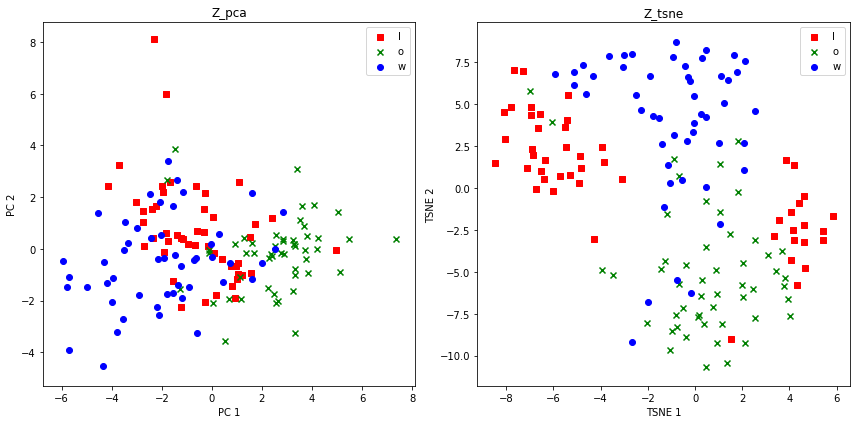

In [24]:
# plot 2D PCA

fig = plt.figure(figsize=(12, 6))


colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
plt1 = fig.add_subplot(1, 2, 1)
visualize2D(Z_pca, Y_load, plt, colors, markers, 'Z_pca', 'PC 1', 'PC 2', 
            legend='lower left', tight=True)
    
# plot t-SNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)
plt2 = fig.add_subplot(1, 2, 2)
visualize2D(Z_tsne, Y_load, plt, colors, markers, 'Z_tsne', 'TSNE 1', 'TSNE 2', 
            legend='lower left', tight=True)